# Задание

### Преподаватель: 
Даниил Корбут, Наталья Баданина

### Цель: 
применить на практике методы по оценке качества данных.

### Описание задания:
В домашней работе необходимо провести очистку данных на примере датасета с информацией о пассажирах корабля Титаник. Данные можно скачать по ссылке https://www.kaggle.com/hesh97/titanicdataset-traincsv или найти в материалах к уроку. На полученных данных обучите модель классификации, с целевым признаком Survived (1 – пассажир выжил, 0 – погиб). Обучите модель на необработанных данных и посчитайте метрику качества. Проведите очистку данных. Обучите модель на данных после обработки, посчитайте метрику качества. Сравнить полученные результаты. Значение метрики должно улучшиться.

### Этапы работы:

- Получите и загрузите данные.
- Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.
- Снова загрузите полные данные.
- Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.
- Проверьте данные на наличие пропущенных значений.
- a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.
- b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.
- Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.
- Проверьте данные на наличие выбросов.
- a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.
- *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)
- *Попробуйте математически преобразовать признак Age.
- Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.
- Сформулируйте выводы по проделанной работе.
- a) Кратко опишите какие преобразования были сделаны и почему.
- b) Сравните метрики моделей из п. 2 и п. 10.
- c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. *Нужно ли аналогичным образов исследовать и дополнять действительно большие данные?

Для получения зачета по этому домашнему заданию, минимально, должно быть построено две модели, выведена одна метрика для каждой. В данных должны быть обработаны пропуски и категориальные значения.

### Результат: 
применены на практике основные методы разведочного анализа данных (exploratory data analysis, EDA). Проведена оценка качества данных.

### Форма выполнения:
- ссылка на Jupyter Notebook, загруженный на GitHub;
- ссылка на Google Colab;
- файл с расширением .ipynb.

### Инструменты:
- Jupyter Notebook/Google Colab;
- GitHub;
- датасет.

### Срок выполнения: 
дедлайн приема решений на проверку
*Рекомендации к выполнению:

Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.
У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читабельность.
Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

In [164]:
import pandas as pd
import numpy as np
# Библиотека для визуализации результатов
import matplotlib.pyplot as plt  
import seaborn as sns

# В какой-то момент нам может пригодится библиотека для замены категориальных значений их кодами
from sklearn.preprocessing import LabelEncoder

In [63]:
# Две функции, использованные на занятии Алексея Кузьмина по работе с пропусками. Пригодятся.
def get_boxplot(X, columns=[]):
    for i in columns:
        sns.boxplot(x=X[i])
    pass  

def get_pairplot(X, columns=None):
    if columns is None:
        columns = list(X.columns)
    sns.pairplot(X[columns])
    pass 

In [3]:
##########################
# Получите и загрузите данные 
##########################
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
##########################
# Удалите все пропущенные значения и категориальные переменные. 
# Обучите модель. 
# Выберите и посчитайте метрику качества.
##########################

# Кажется нерациональным удалять среди прочего информацию о поле пассажиров, но раз удалить надо все категориальные данные - ок.
data_cleared = data[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].dropna().copy()
data_cleared.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        714 non-null    int64  
 5   Parch        714 non-null    int64  
 6   Fare         714 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 44.6 KB


In [6]:
# Обучаем модель. 
# Вначале грузим библиотеки
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [15]:
# Теперь определяем данные и целевое значение
X = data_cleared[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].copy()
y = data_cleared.Survived.copy()
print(X.info())
print(y)

# Убеждаемся в том, что и в данных и в целевой серии равное количество строк, а набор столбцов в данных соответствует ожиданиям

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Pclass       714 non-null    int64  
 2   Age          714 non-null    float64
 3   SibSp        714 non-null    int64  
 4   Parch        714 non-null    int64  
 5   Fare         714 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 39.0 KB
None
0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64


In [16]:
# Разделяем данные, оставляя 20 процентов на тестовые данные. Используем магическое число Д.Адамса для фиксации random_state :)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Создаем модель и обучаем ее
lite_model = LogisticRegression()
lite_model.fit(X_train, y_train)

# Предсказываем:
predictions = lite_model.predict(X_test)

# Сравним первые 40 значений. Не забываем, что 1 - пассажир выжил, 0 - нет.
print(f'Предсказание (первые 40 из тестовой части выборки):\n{pd.Series(predictions[0:40]).to_list()}')
print(f'А на самом деле:\n{y_test[0:40].to_list()}')

# Видим, что совпадений много, но не мало и ошибок в предсказании

Предсказание (первые 40 из тестовой части выборки):
[0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
А на самом деле:
[0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0]


In [25]:
# Из прошлого занятия взял и слегка подрихтовал код для вычисления некоторых метрик качества предсказания
# Используем эту функцию и сейчас, для оценки качества лайтового предсказания, и потом, когда поработаем с моделью
def get_prediction_metrics(y_test_, y_predictions_, print_metrics = False):
    tp, fn, fp, tn = 0, 0, 0, 0
    for ind, yy in enumerate(y_test_):
        if y_predictions_[ind] == 1:
            if yy == 1:
                tp += 1
            else:
                fp += 1
        else:
            if yy == 1:
                fn += 1
            else:
                tn += 1
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    precision = tp / (tp + fp)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    if print_metrics:
        print(f'Точность (accuracy) предсказания: {accuracy}')
        print(f'Точность-2 (precision) предсказания: {precision}')
        print(f'True positive rate: {tpr}')
        print(f'False positive rate: {fpr}')

    return accuracy, precision, tpr, fpr

# Считаем, что получится (полученные данные использовать сейчас не будем, сохраним на потом. Но сразу распечатаем метрики)   
foo = get_prediction_metrics(y_test_ = y_test, y_predictions_ = predictions, print_metrics = True )

Точность (accuracy) предсказания: 0.6993006993006993
Точность-2 (precision) предсказания: 0.6666666666666666
True positive rate: 0.4642857142857143
False positive rate: 0.14942528735632185


In [31]:
##########################
# Снова загрузите полные данные
# А вот и незачем - у нас все ходы записаны
##########################
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
##########################
# Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.
##########################
# Пройдемся последовательно по каждому из признаков

In [58]:
# Вначале проверим наличие пропущенных значений (беру свою функцию из предыдущей домашки)

def count_nans(df, col_name):
    return len(df[pd.isnull(df[col_name])])

for col in data.columns:
    empty_vals = count_nans(data, col)
    if empty_vals > 0:
        print(f'Колонка {col} содержит {empty_vals} пустых строк')
        
# Сразу можем увидеть, что неполные данные в полях Age, Cabin, Embarked. Запомним.

Колонка Age содержит 177 пустых строк
Колонка Cabin содержит 687 пустых строк
Колонка Embarked содержит 2 пустых строк


Text(0.5, 1.0, 'Missing values heatmap')

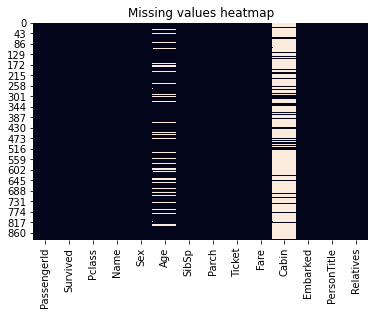

In [160]:
# Еще один способ посмотреть на пропущенные значения
sns.heatmap(data.isnull(), cbar = False).set_title("Пропущенные значения")

In [41]:
# PassengerId. Интуитивно кажется, что это - уникальный идентификатор пассажира, который для нашей задачи совершенно не нужен. 
# Едва ли какие-то из пассажиров встречаются в датасете больше одного раза. Тем не менее посмотрим вот что:

print(f'Всего записей: {len(data.PassengerId)}, из них уникальных: {len(data.PassengerId.unique())}')

# Это поле удалим безжалостно.

Всего записей: 891, из них уникальных: 891


In [44]:
# Survived - это наше целевое поле. На всякий случай посмотрим, нет ли в нем пропусков
data.Survived.describe()

# Все норм. 

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [53]:
# Pclass - это, насколько я понимаю, класс пассажиро
print(f'Всего записей: {data.Pclass.count()}, уникальные значения {data.Pclass.unique()}')

# Интереса ради посмотрим, пассажирам какого класса повезло больше.
data[['Pclass', 'Survived', 'PassengerId']].groupby(['Pclass', 'Survived']).count()

# Мы видим, что во-первых в этой колонке нет пропусков, а во-вторых что чем выше класс, тем выше шансы выжить. Поле оставляем.

Всего записей: 891, уникальные значения [3 1 2]


PassengerId
Pclass Survived             
1      0                  80
       1                 136
2      0                  97
       1                  87
3      0                 372
       1                 119

In [116]:
# Name - в этом поле хранится имя пассажира. Теоретически можно было бы вытянуть какую-нибудь информацию о национальности
# или еще каких-то параметрах, которые как-то могли бы влиять на поведенческие паттерны пассажира.
# Еще одна возможность - найти членов одной семьи и, возможно, использовать эту информацию для предсказания возраста.
# Но вообще конечно это поле - под снос. Все имена уникальны, имя само по себе на исход катастрофы не влияет.

# UPD: Пока разбирался с другими полями, родилась идея вернуться к этому полю. 
# Этот текст пишу уже по окончании просмотра всех полей. На самом деле в поле Name для всех пассажиров указан титул. 
# Правильнее его называть гоноратив. Исследуем:

data['PersonTitle'] = data.Name.apply(lambda person_info: person_info.split(',')[1].split('.')[0].strip())
print(data['PersonTitle'].count())
print(data['PersonTitle'].unique())
data[['PersonTitle', 'Survived', 'PassengerId']].groupby(['PersonTitle', 'Survived']).count()

# Отлично! Получился хороший достаточно информативный, со своими статистическими паттернами категориальный параметр!

891
['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


PassengerId
PersonTitle  Survived             
Capt         0                   1
Col          0                   1
             1                   1
Don          0                   1
Dr           0                   4
             1                   3
Jonkheer     0                   1
Lady         1                   1
Major        0                   1
             1                   1
Master       0                  17
             1                  23
Miss         0                  55
             1                 127
Mlle         1                   2
Mme          1                   1
Mr           0                 436
             1                  81
Mrs          0                  26
             1                  99
Ms           1                   1
Rev          0                   6
Sir          1                   1
the Countess 1                   1

In [56]:
# Sex - пол пассажира. Очевидно, что это поле крайне полезно, конечно мы его преобразуем в нолики и единички. И оставим.
# Проверим на пропуски
print(f'Всего записей: {data.Sex.count()}, пропуски: {data.}, уникальные значения {data.Sex.unique()}')

# Интереса ради посмотрим, пассажирам какого класса повезло больше.
data[['Sex', 'Survived', 'PassengerId']].groupby(['Sex', 'Survived']).count()


Всего записей: 891, уникальные значения ['male' 'female']


PassengerId
Sex    Survived             
female 0                  81
       1                 233
male   0                 468
       1                 109

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


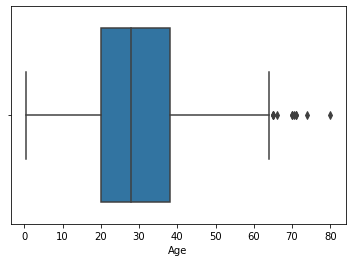

In [65]:
# Age - возраст пассажира. Ранее мы уже увидели, что колонка Age содержит 177 пустых строк.
# Логично предположить, что это поле - важное. Будем пытаться восстановить значение этого поля для пропусков.
# Как? Пока не знаю. Закончу вначале анализ колонок.
# Интереса ради посмотрим, пассажирам какого класса повезло больше.
print(data.Age.describe())
# 
# Видим, что минимальный возраст - меньше года, средний возраст - 28, максимальный - 80.

get_boxplot(data, ['Age'])

In [68]:
# SibSp -  количество братьев и сестер или супруга(и) пассажира, которые находятся с ним на борту. Поле кажется полезным. 

# Смотрим на то, как значения этого поля влияют на результат.
data[['SibSp', 'Survived', 'PassengerId']].groupby(['SibSp', 'Survived']).count()

# Видно, что больше шансов выжить было у тех, у кого была пара. Одинокие или обремененные большими семьями выживали хуже...

PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7

In [69]:
# Parch - детей пассажира или родителей пассажира, которые находятся с ним на борту. Это поле похоже на предыдущее,
# Оно тоже кажется полезным. 
# Смотрим на эффект этого поля.
data[['Parch', 'Survived', 'PassengerId']].groupby(['Parch', 'Survived']).count()


PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1

In [130]:
# Для этих двух колонок видно, что общая тенденция по каждому из этих полей похожа. Если человек одинокий, его шансы выжить меньше
# чем если пассажиров двое (пара, родитель-ребенок)
# Далее чем больше в семье людей, тем шансов на спасение меньше.
# В этой связи удобно объединить эти две колонки, просто сложив значения в этих колонках.
data['Relatives'] = data['SibSp'] + data['Parch']
data[['SibSp', 'Parch', 'Relatives']].head()

,SibSp,Parch,Relatives
0,1,0,1
1,1,0,1
2,0,0,0
3,1,0,1
4,0,0,0


In [76]:
# Ticket - поле, которое кажется бесполезным. Теоретически код билета может определять место, где билет куплен
# и не исключено, что место покупки билета может влиять на итоговую статистику, но пока не понимаю, как это можно проверить.

data[['Ticket', 'PassengerId']].groupby(['Ticket']).count()

# На самом деле похоже, что это поле может оказаться полезным. Скорее всего, один билет покупался на семью и в него 
# вписывались родственники. 
# С одной стороны если заменить эту колонку на цифру, соответствующую количеству пассажиров, вписанных в билет,
# мы можем получить колонку, которая фактически дублирует колонку, которую можно получить суммированием полей Parch и Sibsp
# Но возможно, эту колонку можно использовать для предсказания недостающих значений.
# К примеру если у какого-то пассажира нет информации о возрасте, но известно, что он ехал с партнером или братом-сестрой,
# то если у партнера окажется указанным возраст, можно пассажиру ставить такой же возраст 
# (а его партнера можно найти как раз по совпадению номера билета)

# Тем не менее из общего датасета я бы это поле убрал. По-крайней мере после заполнения пропусков.

,PassengerId
Ticket,
110152,3
110413,3
110465,2
110564,1
110813,1
...,...
W./C. 6608,4
W./C. 6609,1
W.E.P. 5734,1


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


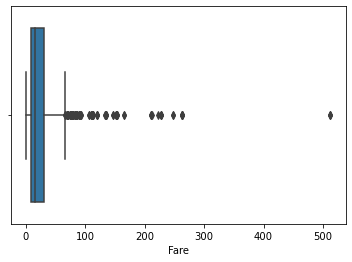

In [80]:
# Fare - стоимость билета. Сейчас посмотрим
print(data.Fare.describe())

# Видим, что с одной стороны есть нулевая стоимость билетов, но также есть и явные выбросы по максимальной стоимости.
get_boxplot(data, ['Fare'])

# Далее попробуем внимательнее посмотреть на выявленные хвосты.

In [131]:
print(data[data.Fare<4].count())
data[data.Fare<4].head(50)

# Обнаружили 15 записей с нулевой ценой за билеты. 

PassengerId    15
Survived       15
Pclass         15
Name           15
Sex            15
Age             7
SibSp          15
Parch          15
Ticket         15
Fare           15
Cabin           3
Embarked       15
PersonTitle    15
Relatives      15
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PersonTitle,Relatives
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,Mr,0
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,Mr,0
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Mr,0
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,Mr,0
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,Mr,0
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,Mr,0
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,Mr,0
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,Mr,0
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,Mr,0
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,Mr,0


In [132]:
print(data[data.Fare>200].count())
data[data.Fare>200].head(50)

# Обнаружили 20 записей с высокой ценой за билеты (больше 200). 
# С одной стороны получается, что цена сильно отличается от средней. С другой стороны выбросами это тоже считать не хочется.
# Теоретически можно это поле преобразовать. Один из вариантов - вместо текцщей цены взять цену за одного пассажира
# для этого билета. Это позволит уменьшить разброс цен.
# Кстати изучение этой таблицы показывает, что вписанные в один и тот же билет пассажиры могут не быть родственниками.
# Видимо, в билет могли вписать в том числе слуг? В частности билет PC17755 у трех пассажиров, у которых "не бьются"
# значения колонок SibSp и Parch.

PassengerId    20
Survived       20
Pclass         20
Name           20
Sex            20
Age            18
SibSp          20
Parch          20
Ticket         20
Fare           20
Cabin          17
Embarked       20
PersonTitle    20
Relatives      20
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PersonTitle,Relatives
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,Mr,5
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,Miss,5
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,Mr,1
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss,0
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,Mrs,1
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,Miss,4
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,Miss,5
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C,Mr,2
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C,Miss,0
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,Mr,5


In [ ]:
# Поле Cabin имеет пропуски, при этом для некоторых пассажиров в этом поле указано несколько кают.
# Кажется, что это поле косвенно связано с классом пассажира, с ценой на билет. 
# Я бы эту колонку удалил, не знаю, как его использовать

In [90]:
# Embarked - город, где пассажир зашел на судно (согласно википедии https://ru.wikipedia.org/wiki/%D0%A2%D0%B8%D1%82%D0%B0%D0%BD%D0%B8%D0%BA)
# 10 апреля 1912 года «Титаник» отправился из Саутгемптона в Нью-Йорк, в свой первый и единственный рейс. 
# Совершив остановки во французском Шербуре и ирландском Квинстауне, 
# лайнер вышел в Атлантический океан с 1317 пассажирами[6][7][8] и 908 членами экипажа[9] на борту. 
# S - Southampton, C - Cherbourg, Q - Queenstown
# Это - категориальная переменная, с пропусками (всего две строки)
# Это поле может оказывать какое-либо влияние на распределение. Проверим: 

data[['Embarked', 'Survived', 'PassengerId']].groupby(['Embarked', 'Survived']).count()

# Видно, что больше половины пассажиров из Шербурга спаслись, из каждых 5 человек из Квинстауна погибло 3, 
# А самым печальным по статистике оказался Саутгемптон. Пассажиров из этого города выжило в два раза меньше, чем погибло.

PassengerId
Embarked Survived             
C        0                  75
         1                  93
Q        0                  47
         1                  30
S        0                 427
         1                 217

In [133]:
# Посмотрим, для каких пассажиров выпала информация о городе посадки
data[data.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PersonTitle,Relatives
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,0


In [103]:
# Попытки увидеть какие-то закономерности в данных по билетам из той же ценовой категории
# data[data.Fare>75][data.Fare<85].head(50)

In [211]:
# Ну а теперь пришла пора чистить признаки, добавлять новые и заполнять пропуски.
# Чтобы удобнее было работать и иметь возможность откатиться в случае ошибок на этот этап, не убивая ранее сделанного,
# создаю копию нашего не очень большого датасета и далее работаю с копией.

data_fltr = data.copy()
# Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.
# Удаляю. Надеюсь, обосновал выше
data_fltr.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
data_fltr.head()


,Survived,Pclass,Sex,Age,Fare,Embarked,PersonTitle,Relatives
0,0,3,male,22.0,7.2500,S,Mr,1
1,1,1,female,38.0,71.2833,C,Mrs,1
2,1,3,female,26.0,7.9250,S,Miss,0
3,1,1,female,35.0,53.1000,S,Mrs,1
4,0,3,male,35.0,8.0500,S,Mr,0


In [212]:
##########################
# Проверьте данные на наличие пропущенных значений.
# a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.
# b) Заполните пропуски: средним значением; константой; классом, указывающим на то, 
# что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. 
# Можно не использовать все перечисленные методы.
# Категориальные переменные переведите в цифровые значения. 
# Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.
##########################

# На наличие пропущенных значений все проверено ранее. 
# В итоговом датасете осталось две колонки с потерянными данными (Age и Embarked)
# Считаем процент потерянных данных в случае, если мы грохнем все пустые значения

print(f'Процент потерь при удалении всех пропусков: {len(data[pd.isnull(data["Age"])]) * 100 / data["Survived"].count()} ')


Процент потерь при удалении всех пропусков: 19.865319865319865 


In [213]:
# Вначале - легкое. Заполним пропуски в колонке Embarked
# Предварительно создадим новую колонку, заменив категориальное поле с сематническим контентом на поле с кодами
le = LabelEncoder()
data_fltr['Embarked_id'] = le.fit_transform(data_fltr['Embarked'])
# Далее переопределяем значения для колонки Embarked_id для строк, в которых Embarked = NaN, на моду
data_fltr.loc[data_fltr[data_fltr['Embarked'].isna()].index, 'Embarked_id'] = data_fltr['Embarked_id'].mode()[0]
#print(data_fltr[data_fltr.Embarked.isnull()])

# И удаляем колонку Embarked
data_fltr.drop(['Embarked'], axis=1, inplace=True)
data_fltr.head()

,Survived,Pclass,Sex,Age,Fare,PersonTitle,Relatives,Embarked_id
0,0,3,male,22.0,7.2500,Mr,1,2
1,1,1,female,38.0,71.2833,Mrs,1,0
2,1,3,female,26.0,7.9250,Miss,0,2
3,1,1,female,35.0,53.1000,Mrs,1,2
4,0,3,male,35.0,8.0500,Mr,0,2


In [214]:
# Заодно разберемся и с колонками Sex и PersonTitle
data_fltr['Sex_id'] = le.fit_transform(data_fltr['Sex'])
data_fltr['PersonTitle_id'] = le.fit_transform(data_fltr['PersonTitle'])
data_fltr.head()

,Survived,Pclass,Sex,Age,Fare,PersonTitle,Relatives,Embarked_id,Sex_id,PersonTitle_id
0,0,3,male,22.0,7.2500,Mr,1,2,1,11
1,1,1,female,38.0,71.2833,Mrs,1,0,0,12
2,1,3,female,26.0,7.9250,Miss,0,2,0,8
3,1,1,female,35.0,53.1000,Mrs,1,2,0,12
4,0,3,male,35.0,8.0500,Mr,0,2,1,11


In [215]:
# И удаляем колонки
data_fltr.drop(['Sex', 'PersonTitle'], axis=1, inplace=True)
data_fltr.head()

,Survived,Pclass,Age,Fare,Relatives,Embarked_id,Sex_id,PersonTitle_id
0,0,3,22.0,7.2500,1,2,1,11
1,1,1,38.0,71.2833,1,0,0,12
2,1,3,26.0,7.9250,0,2,0,8
3,1,1,35.0,53.1000,1,2,0,12
4,0,3,35.0,8.0500,0,2,1,11


In [235]:
# Теперь необходимо разобраться с пропусками в колонке Age
# Можно посмотреть, как выглядит медианный возраст для группировки по титулу, полу и классу пассажира
grp = data_fltr.groupby(['PersonTitle_id', 'Sex_id', 'Pclass'])
grp.Age.apply(lambda x: x.fillna(x.median()))
grp.Age.median()

#data_fltr.describe()

PersonTitle_id  Sex_id  Pclass
0               1       1         70.0
1               1       1         58.0
2               1       1         40.0
3               0       1         49.0
                1       1         38.0
                        2         38.5
4               1       1         38.0
5               0       1         48.0
6               1       1         48.5
7               1       1          4.0
                        2          1.0
                        3          6.5
8               0       1         30.0
                        2         24.0
                        3         22.0
9               0       1         24.0
10              0       1         24.0
11              1       1         36.0
                        2         30.0
                        3         28.0
12              0       1         38.5
                        2         32.0
                        3         29.0
13              0       2         28.0
14              1       2        

In [221]:
# А теперь заполним пропуски для колонки с возрастом
data_fltr.Age.fillna(data_fltr.Age.median(), inplace=True)
print(data_fltr.describe())
data_fltr.head()

# Кстати одним из способов преобразования колонки возраста могло бы стать создание альтернативного категориального признака
# С диапазоном возрастов. Можно было бы разбить его по персентилям или по иному признаку (до 18 лет, 18 - 25, 26 - 35 и т.п.)
# Я решил с этим не заморачиваться и оставить все как есть.

         Survived      Pclass         Age        Fare   Relatives  \
count  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642   29.361582   32.204208    0.904602   
std      0.486592    0.836071   13.019697   49.693429    1.613459   
min      0.000000    1.000000    0.420000    0.000000    0.000000   
25%      0.000000    2.000000   22.000000    7.910400    0.000000   
50%      0.000000    3.000000   28.000000   14.454200    0.000000   
75%      1.000000    3.000000   35.000000   31.000000    1.000000   
max      1.000000    3.000000   80.000000  512.329200   10.000000   

       Embarked_id      Sex_id  PersonTitle_id  
count   891.000000  891.000000      891.000000  
mean      1.536476    0.647587       10.241302  
std       0.791503    0.477990        1.830798  
min       0.000000    0.000000        0.000000  
25%       1.000000    0.000000        8.000000  
50%       2.000000    1.000000       11.000000  
75%       2.000000    1.000000     

,Survived,Pclass,Age,Fare,Relatives,Embarked_id,Sex_id,PersonTitle_id
0,0,3,22.0,7.2500,1,2,1,11
1,1,1,38.0,71.2833,1,0,0,12
2,1,3,26.0,7.9250,0,2,0,8
3,1,1,35.0,53.1000,1,2,0,12
4,0,3,35.0,8.0500,0,2,1,11


In [224]:
##########################
# Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.
##########################
X2 = data_fltr[['Pclass', 'Age', 'Fare', 'Relatives', 'Embarked_id', 'Sex_id', 'PersonTitle_id']].copy()
y2 = data_fltr['Survived'].copy()
# Разделяем данные, оставляя 20 процентов на тестовые данные. Используем магическое число Д.Адамса для фиксации random_state :)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [226]:
# Создаем модель и обучаем ее
lite_model2 = LogisticRegression()
lite_model2.fit(X_train2, y_train2)



LogisticRegression()

In [227]:
# Предсказываем:
predictions2 = lite_model2.predict(X_test2)

# Сравним первые 40 значений. Не забываем, что 1 - пассажир выжил, 0 - нет.
print(f'Предсказание (первые 40 из тестовой части выборки):\n{pd.Series(predictions2[0:40]).to_list()}')
print(f'А на самом деле:\n{y_test2[0:40].to_list()}')

Предсказание (первые 40 из тестовой части выборки):
[0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0]
А на самом деле:
[1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0]


In [230]:
# Выводим метрики:   
foo2 = get_prediction_metrics(y_test_ = y_test2, y_predictions_ = predictions2, print_metrics = True )

Точность (accuracy) предсказания: 0.7988826815642458
Точность-2 (precision) предсказания: 0.7714285714285715
True positive rate: 0.7297297297297297
False positive rate: 0.1523809523809524


In [231]:
# А это еще раз - старые:   
foo = get_prediction_metrics(y_test_ = y_test, y_predictions_ = predictions, print_metrics = True )

Точность (accuracy) предсказания: 0.6993006993006993
Точность-2 (precision) предсказания: 0.6666666666666666
True positive rate: 0.4642857142857143
False positive rate: 0.14942528735632185


In [232]:
##########################
# Сформулируйте выводы по проделанной работе.
# a) Кратко опишите какие преобразования были сделаны и почему.
# b) Сравните метрики моделей из п. 2 и п. 10.
# c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. 
# *Нужно ли аналогичным образов исследовать и дополнять действительно большие данные?
##########################

# a) Кратко опишите какие преобразования были сделаны и почему
# Часть колонок была удалена, были заполнены пропуски, были созданы новые колонки, были преобразованы категориальные данные
#
# b) Сравните метрики моделей из п. 2 и п. 10.
# Точность предсказания выросла почти на 10 процентов (с учетом всех совершенных ошибок)
# На 11 процентов повысилась эффективность предсказания позитивного исхода
# Больше чем на 25 процентов улучшился показатель True Positive Rate
# Слегка (на 0.3 процента) ухудшился показатель False positive rate, и это - единственное ухудшение.
#
# c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения
#
# Ну конечно работа с данными целесообразна. Подобного рода работа позволяет еще на этапе анализа данных
# понять какие-то закономерности, возможно - дать рекомендации тем, кто собирает данные, по поводу их будущего формата,
# подсказать им, какие парамеры избыточны, какие было бы целесообразно получить дополнительно, где есть выбросы или пропуски.
#
# Удаление ненужных столбцов позволяет снизить избыточность данных или убрать ту информацию, которая носит случайный характер
# Удаление неполных данных в случае, если их невозможно точно дополнить, также влияет и на адекватность работы 
# библиотек оптимизации, и на небольшое сокращение массива данных в случае, если и без того выборка данных достаточна
# Заполнение пропусков иногда можно сделать с высокой степенью точности, и это также может повлиять положительно на общий результат
# 
# 
#
#
